# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
from skimage.io import imread

from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [2]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [3]:
#os.getcwd() + "\\data\\seg_train"
TRAIN_PATH = "C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_train"

In [4]:
os.listdir()

['Clasificador_paisajes.ipynb',
 'Clasificador_paisajes_MTA-LENOVO-Y910-MTA.ipynb',
 'Clasificador_paisajes_MTA.ipynb']

In [5]:
#IMAGE_SIZE = (32,32)
#TRAIN_PATH = os.getcwd() + "\\data\\seg_train"
#TEST_PATH = os.getcwd() + "\\data\\seg_test"

IMAGE_SIZE = (32, 32)

# Rutas actualizadas para los datos de entrenamiento y prueba
TRAIN_PATH = "C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_train"
TEST_PATH = "C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_test"

# Verificar si las rutas son válidas
import os

if os.path.exists(TRAIN_PATH):
    print(f"Ruta de entrenamiento válida: {TRAIN_PATH}")
else:
    print(f"Ruta de entrenamiento no encontrada: {TRAIN_PATH}")

if os.path.exists(TEST_PATH):
    print(f"Ruta de prueba válida: {TEST_PATH}")
else:
    print(f"Ruta de prueba no encontrada: {TEST_PATH}")


Ruta de entrenamiento válida: C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_train
Ruta de prueba válida: C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_test


In [6]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)

        # Procesar solo carpetas
        if not os.path.isdir(folder_path):
            print(f"Ignorado: {folder_path} no es una carpeta.")
            continue

        label = class_names_label.get(folder, None)
        if label is None:
            print(f"Ignorado: {folder} no está en class_names_label.")
            continue

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            try:
                image = imread(image_path)
                smallimage = cv2.resize(image, im_size)
                X.append(smallimage)
                y.append(label)
            except Exception as e:
                print(f"Error en lectura de imagen {image_path}: {e}")

    return np.array(X), np.array(y)



In [7]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Ignorado: C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_train\ej_paisaje.h5 no es una carpeta.
Ignorado: C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_test\ej_paisaje.h5 no es una carpeta.
(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [8]:
pd.Series(y_train).value_counts()

3    2512
2    2404
5    2382
4    2274
1    2271
0    2191
Name: count, dtype: int64

In [9]:
pd.Series(y_test).value_counts()

2    553
3    525
4    510
5    501
1    474
0    437
Name: count, dtype: int64

In [10]:
y_train[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [12]:
y_train[:100]

array([0, 5, 5, 4, 3, 2, 3, 3, 0, 5, 0, 3, 5, 4, 2, 4, 4, 5, 1, 3, 2, 0,
       2, 2, 5, 1, 3, 5, 0, 3, 5, 5, 5, 2, 1, 2, 5, 4, 0, 1, 5, 1, 0, 4,
       0, 5, 1, 2, 3, 5, 4, 0, 2, 3, 5, 4, 0, 4, 1, 3, 3, 2, 4, 4, 2, 3,
       2, 1, 5, 3, 4, 1, 5, 1, 2, 1, 2, 1, 5, 3, 4, 5, 3, 1, 2, 3, 1, 4,
       4, 0, 3, 3, 4, 1, 5, 1, 5, 4, 1, 2])

mountain


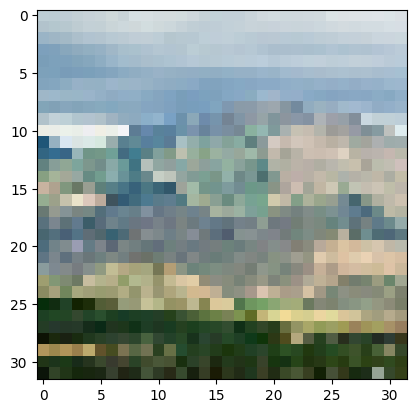

In [13]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [14]:
X_train

array([[[[225, 225, 225],
         [221, 223, 222],
         [221, 223, 222],
         ...,
         [237, 237, 237],
         [238, 238, 238],
         [240, 240, 240]],

        [[230, 230, 230],
         [227, 227, 227],
         [232, 232, 232],
         ...,
         [244, 244, 244],
         [244, 244, 244],
         [246, 246, 246]],

        [[ 55,  55,  55],
         [223, 223, 223],
         [ 88,  87,  88],
         ...,
         [245, 245, 245],
         [246, 246, 246],
         [246, 246, 246]],

        ...,

        [[114, 112, 111],
         [ 97,  96,  94],
         [125, 123, 124],
         ...,
         [ 90,  89,  87],
         [ 88,  87,  85],
         [ 92,  91,  89]],

        [[153, 152, 150],
         [113, 112, 110],
         [123, 121, 122],
         ...,
         [ 83,  82,  79],
         [ 68,  67,  65],
         [ 80,  79,  77]],

        [[131, 130, 128],
         [133, 132, 130],
         [128, 126, 125],
         ...,
         [128, 127, 125],
        

In [15]:
X_train[0][0][0][0]

np.uint8(225)

In [16]:
print(X_train.min())
print(X_train.max())

0
255


In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
print(X_train.min())
print(X_train.max())

0.0


1.0


In [19]:
X_train.shape

(14034, 32, 32, 3)

In [20]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

C:\Users\mikel\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,190 (371.84 KB)

 Trainable params: 95,190 (371.84 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
64 * (3*3) * 3 + 64

1792

In [24]:
32 * (3*3) * 64 + 32

18464

In [25]:
6*6*32

1152

In [26]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [27]:
14034 * 0.8 /128 

87.7125

In [28]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4446 - loss: 1.4013 - val_accuracy: 0.5942 - val_loss: 1.0597
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6188 - loss: 1.0233 - val_accuracy: 0.6537 - val_loss: 0.9067
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6714 - loss: 0.8770 - val_accuracy: 0.6591 - val_loss: 0.8910
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6883 - loss: 0.8417 - val_accuracy: 0.6929 - val_loss: 0.8302
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7288 - loss: 0.7475 - val_accuracy: 0.7089 - val_loss: 0.7723
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7508 - loss: 0.6962 - val_accuracy: 0.7268 - val_loss: 0.7467
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7599 - loss: 0.6585 - val_accuracy: 0.7314 - val_loss: 0.7474
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7688 - loss: 0.6388 - val_accuracy: 0.7239 - v

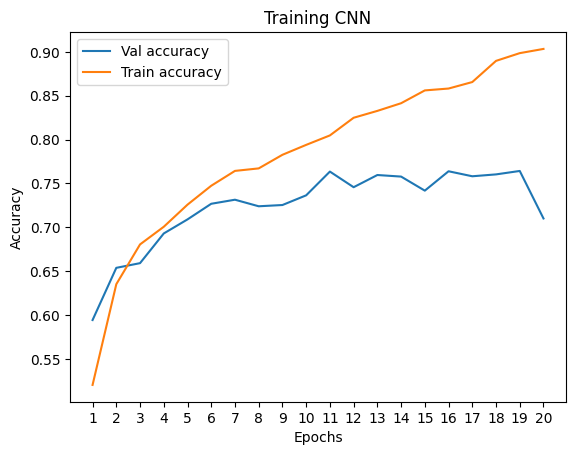

In [29]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.legend()

In [30]:
results = model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7001 - loss: 0.9328


In [31]:
y_pred = model.predict(X_test)
y_pred.round(2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[0.06, 0.01, 0.04, 0.88, 0.  , 0.  ],
       [0.24, 0.  , 0.35, 0.05, 0.  , 0.36],
       [0.21, 0.01, 0.03, 0.2 , 0.5 , 0.05],
       ...,
       [0.31, 0.  , 0.44, 0.17, 0.08, 0.01],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.01, 0.98, 0.  , 0.  , 0.  , 0.01]], dtype=float32)

In [32]:
IMAGE_SIZE = (64,64)

In [33]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Ignorado: C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_train\ej_paisaje.h5 no es una carpeta.
Ignorado: C:/Users/mikel/OneDrive/Documentos/TB-DS-BIO-23.09.24/REPOSITORIOS/Mikel/perros_paisajes/clasificador_paisajes/seg_test\ej_paisaje.h5 no es una carpeta.
(14034, 64, 64, 3)
(3000, 64, 64, 3)
(14034,)
(3000,)


In [34]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_train = X_train/255
X_test = X_test/255

In [35]:
print(X_train.shape)

(14034, 64, 64, 3)


In [39]:
model_2 = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])
model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_2 = model_2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)

Epoch 1/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.4600 - loss: 1.3286 - val_accuracy: 0.6623 - val_loss: 0.8941
Epoch 2/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 24s 134ms/step - accuracy: 0.6715 - loss: 0.8712 - val_accuracy: 0.6787 - val_loss: 0.8429
Epoch 3/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.7220 - loss: 0.7472 - val_accuracy: 0.7335 - val_loss: 0.7417
Epoch 4/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 133ms/step - accuracy: 0.7745 - loss: 0.6233 - val_accuracy: 0.7688 - val_loss: 0.6579
Epoch 5/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.7975 - loss: 0.5493 - val_accuracy: 0.7285 - val_loss: 0.7702
Epoch 6/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.8320 - loss: 0.4536 - val_accuracy: 0.7585 - val_loss: 0.6923
Epoch 7/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 24s 139ms/step - accuracy: 0.8500 - loss: 0.3999 - val_accuracy: 0.7634 - val_loss: 0.7042
Epoch 8/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 127ms/step - accuracy: 0.8931 - loss: 0

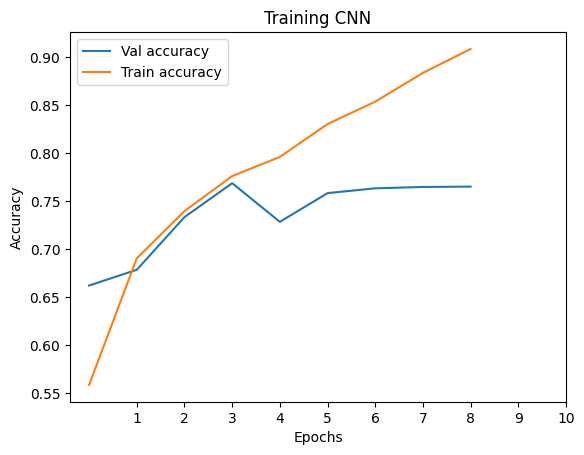

In [43]:
df_hist = pd.DataFrame(history_2.history)
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,11))
plt.legend()

In [ ]:
results = model_2.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7052 - loss: 1.1764


In [ ]:
y_pred = model_2.predict(X_test)
y_pred.round(2)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


array([[0.  , 0.  , 0.15, 0.85, 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.88, 0.11, 0.  ],
       ...,
       [0.  , 0.  , 0.07, 0.69, 0.23, 0.  ],
       [0.  , 0.  , 0.  , 0.04, 0.95, 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.02]], dtype=float32)

mountain


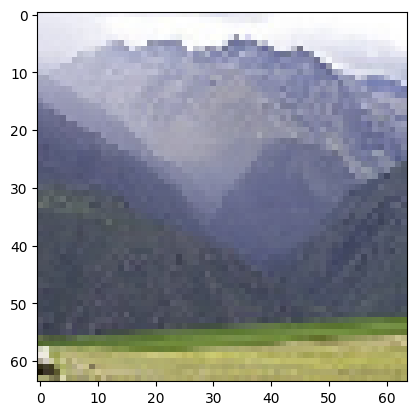

In [ ]:
print(class_names[y_test[0]])
plt.imshow(X_test[0])

In [ ]:
pred_labels = np.argmax(y_pred, axis=1)
print(pred_labels)
pred_names = [class_names[pred] for pred in pred_labels]
print(pred_names)

[3 2 3 ... 3 4 1]
['mountain', 'glacier', 'mountain', 'street', 'street', 'glacier', 'glacier', 'glacier', 'buildings', 'street', 'sea', 'buildings', 'street', 'mountain', 'street', 'forest', 'glacier', 'forest', 'street', 'street', 'glacier', 'mountain', 'glacier', 'mountain', 'glacier', 'sea', 'street', 'glacier', 'buildings', 'mountain', 'glacier', 'mountain', 'forest', 'street', 'buildings', 'buildings', 'mountain', 'mountain', 'buildings', 'glacier', 'mountain', 'buildings', 'buildings', 'forest', 'glacier', 'glacier', 'sea', 'buildings', 'buildings', 'glacier', 'glacier', 'forest', 'buildings', 'buildings', 'buildings', 'street', 'glacier', 'forest', 'buildings', 'glacier', 'forest', 'forest', 'buildings', 'buildings', 'street', 'glacier', 'glacier', 'mountain', 'mountain', 'forest', 'mountain', 'street', 'street', 'mountain', 'glacier', 'forest', 'sea', 'street', 'mountain', 'mountain', 'mountain', 'mountain', 'forest', 'glacier', 'buildings', 'buildings', 'street', 'glacier', '

<Axes: >

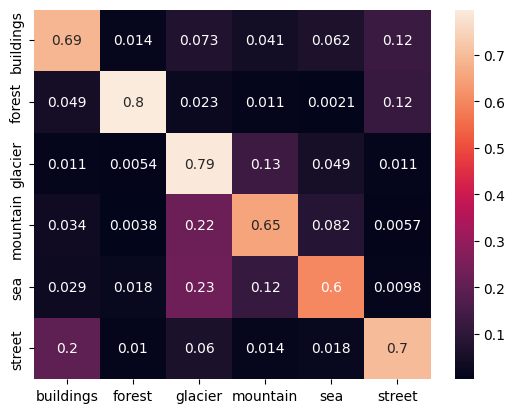

In [ ]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       437
           1       0.94      0.80      0.86       474
           2       0.59      0.79      0.68       553
           3       0.68      0.65      0.67       525
           4       0.74      0.60      0.66       510
           5       0.74      0.70      0.72       501

    accuracy                           0.71      3000
   macro avg       0.72      0.70      0.71      3000
weighted avg       0.72      0.71      0.71      3000



In [ ]:
model_3 = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(16, (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])
model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history_3 = model_3.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)

C:\Users\mikel\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.4348 - loss: 1.4535 - val_accuracy: 0.5280 - val_loss: 1.1580
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6247 - loss: 1.0166 - val_accuracy: 0.5672 - val_loss: 1.1942
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.6671 - loss: 0.9121 - val_accuracy: 0.5326 - val_loss: 1.2080
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.7020 - loss: 0.8133 - val_accuracy: 0.5369 - val_loss: 1.2553
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7068 - loss: 0.7824 - val_accuracy: 0.6459 - val_loss: 0.9282
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.7390 - loss: 0.7166 - val_accuracy: 0.6648 - val_loss: 0.9139
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.7480 - loss: 0.6912 - val_accuracy: 0.6242 - val_loss: 1.0267
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7705 - loss: 0.6633 - val_accuracy: 0.6502 - v

In [ ]:
results = model_3.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7067 - loss: 0.8788


In [44]:
df_hist = pd.DataFrame(history_3.history)
plt.plot(df_hist['val_accuracy'], label="Val accuracy")
plt.plot(df_hist['accuracy'], label="Train accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,11))
plt.legend()

NameError: name 'history_3' is not defined